In [56]:
import importlib
import numpy as np
import pandas as pd

eda_dpp_utils = importlib.import_module('eda_dpp_utils')
feu = importlib.import_module('feature_eng_utils')
rmu = importlib.import_module('linear_reg_utils')
importlib.reload(eda_dpp_utils)
importlib.reload(feu)
importlib.reload(rmu)

df, df_unnormalised, num_cols, df_unclean = eda_dpp_utils.preProcessing()

windows = [3, 6, 12, 24]         
lags    = [1]  
targets = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

# Add MA, lag features
for target in targets:
    for w in windows:
        df[f"{target}_MA_{w}h"] = (
            df[target]
            .rolling(window=w, min_periods=1, center=False)
            .mean()
        )

for target in targets:
    for lag in lags:
        df[f"{target}_lag_{lag}h"] = df[target].shift(lag)

for target in targets:
    df[f"{target}_current"] = df[target]

df['hour'] = np.sin(np.pi * df['hour'] / 4) 
df['weekday'] = np.cos(np.pi * df['weekday'] / 8) 
df['month'] = np.cos(np.pi * df['month'] / 6) 

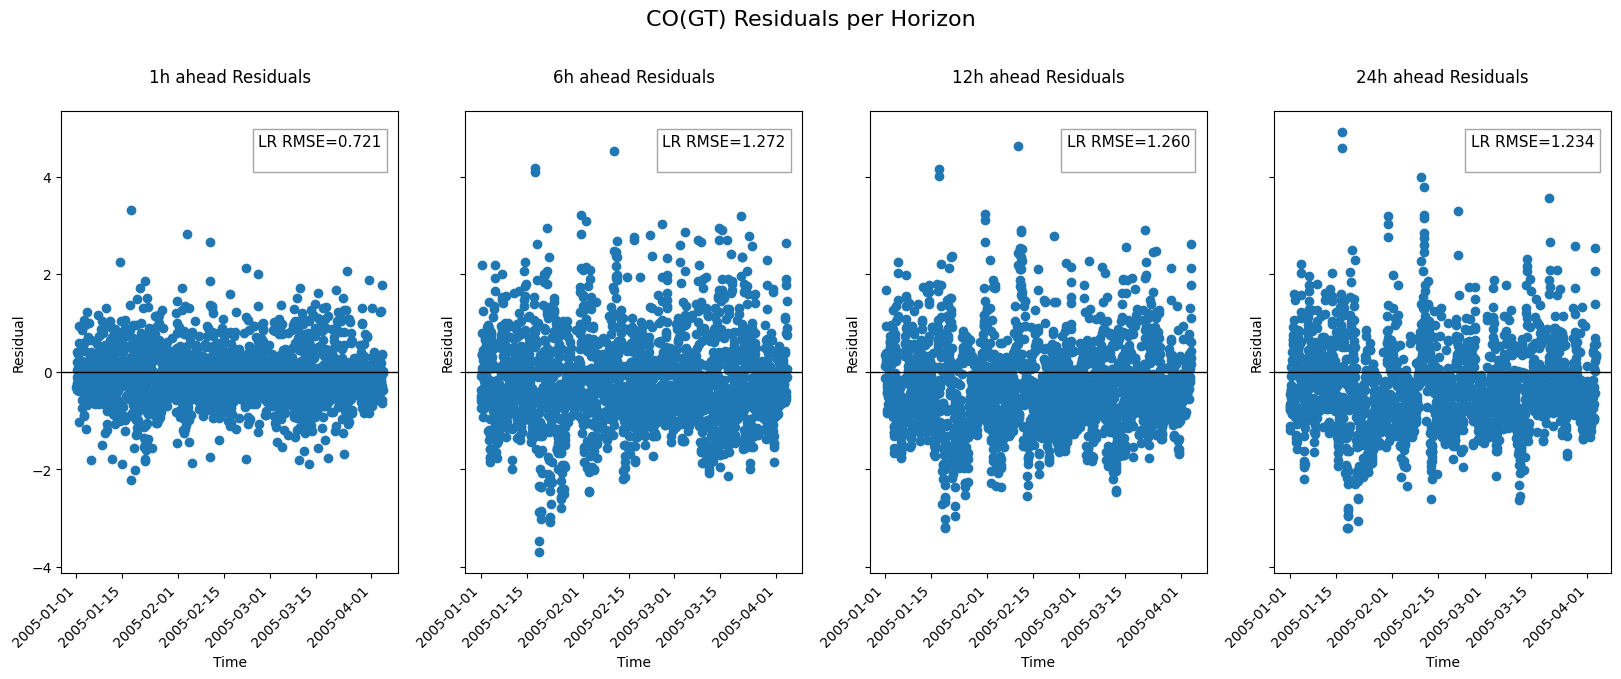

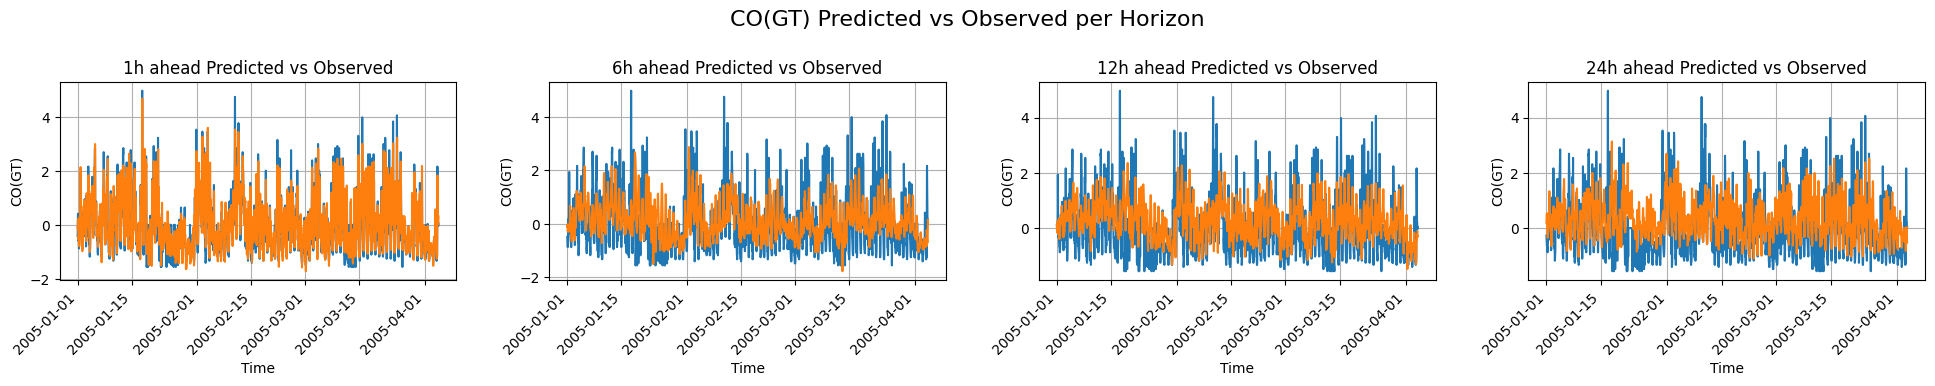

,abs_importance
CO(GT)_current,0.464527
CO(GT)_MA_3h,0.324253
PT08.S2(NMHC),0.313249
NOx(GT)_current,0.289816
CO(GT)_MA_6h,0.289550
C6H6(GT)_lag_1h,0.233283
NO2(GT)_MA_6h,0.230813
NO2(GT)_MA_3h,0.225491
CO(GT)_MA_24h,0.218130
NOx(GT)_MA_6h,0.173145


In [59]:
results = rmu.train_forecast_linear_regression(df, targets[0], targets, df_unnormalised)
results[1]["importance_table"]


In [60]:
results[6]["importance_table"]

,abs_importance
CO(GT)_MA_6h,0.646533
C6H6(GT)_MA_6h,0.644525
PT08.S2(NMHC),0.627583
C6H6(GT)_MA_12h,0.596869
CO(GT)_MA_12h,0.593502
NO2(GT)_MA_12h,0.569047
NOx(GT)_MA_6h,0.547133
C6H6(GT)_MA_3h,0.516404
NOx(GT)_MA_12h,0.427642
NO2(GT)_MA_24h,0.324630


In [61]:
results[12]["importance_table"]

,abs_importance
NOx(GT)_MA_3h,0.848232
NO2(GT)_MA_6h,0.714547
CO(GT)_MA_3h,0.548975
NOx(GT)_MA_24h,0.533807
NO2(GT)_MA_12h,0.519242
NO2(GT)_MA_3h,0.465479
NOx(GT)_current,0.437952
NOx(GT)_MA_12h,0.400396
CO(GT)_MA_24h,0.363898
CO(GT)_MA_12h,0.348914


In [62]:
results[12]["importance_table"]

,abs_importance
NOx(GT)_MA_3h,0.848232
NO2(GT)_MA_6h,0.714547
CO(GT)_MA_3h,0.548975
NOx(GT)_MA_24h,0.533807
NO2(GT)_MA_12h,0.519242
NO2(GT)_MA_3h,0.465479
NOx(GT)_current,0.437952
NOx(GT)_MA_12h,0.400396
CO(GT)_MA_24h,0.363898
CO(GT)_MA_12h,0.348914


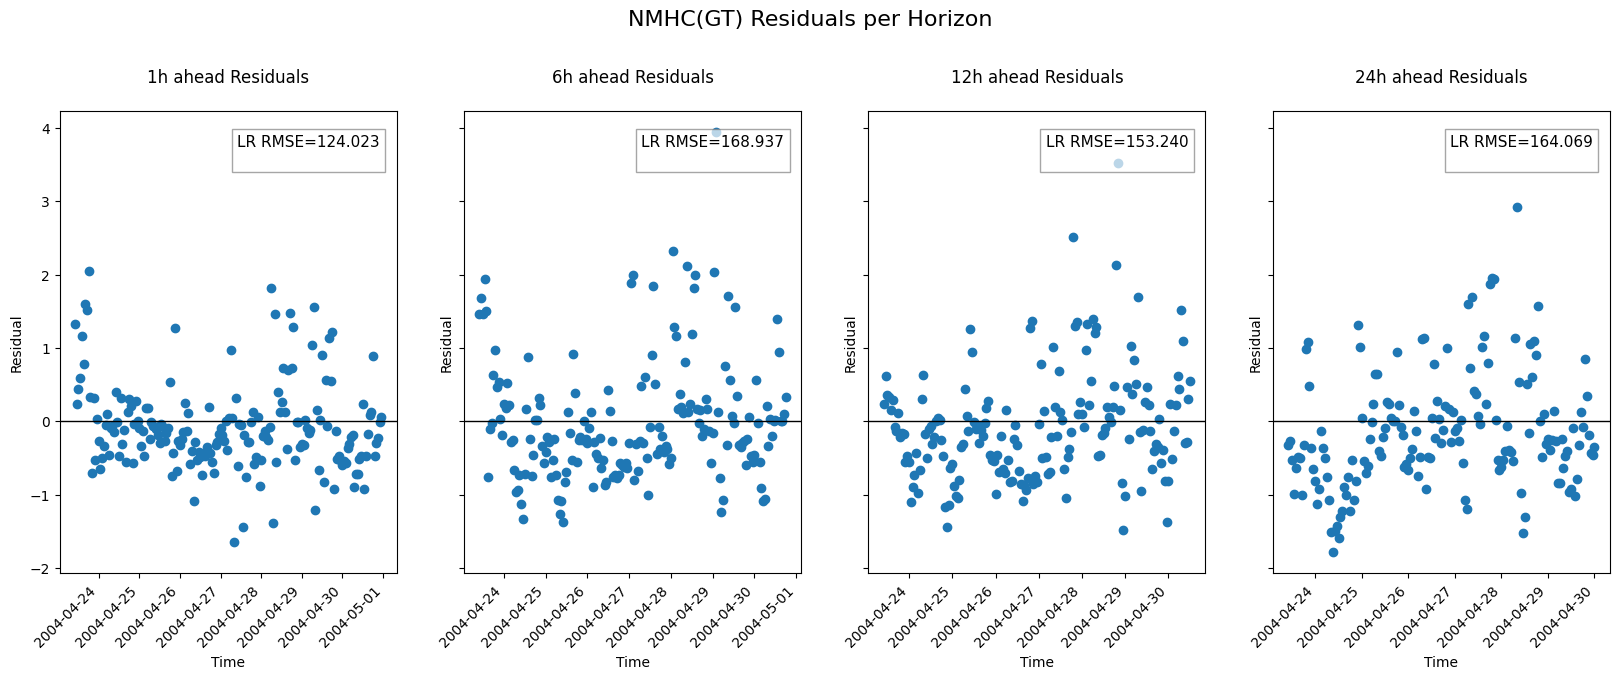

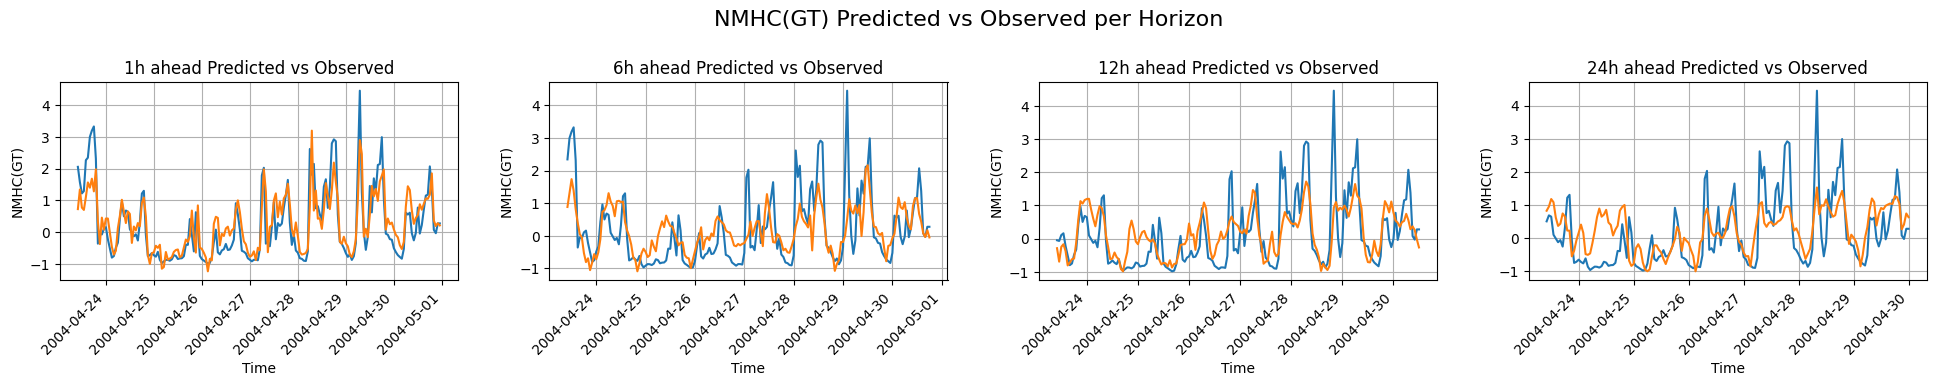

,abs_importance
PT08.S2(NMHC),1.280185
NO2(GT)_MA_3h,1.023994
C6H6(GT)_current,0.957679
NOx(GT)_MA_3h,0.852104
CO(GT)_MA_24h,0.648506
NO2(GT)_MA_6h,0.608243
NOx(GT)_MA_6h,0.481076
C6H6(GT)_MA_24h,0.415523
NO2(GT)_MA_12h,0.328303
C6H6(GT)_MA_3h,0.313947


In [63]:
results = rmu.train_forecast_linear_regression(df, targets[1], targets, df_unnormalised)
results[1]["importance_table"]
results[6]["importance_table"]
results[12]["importance_table"]
results[24]["importance_table"]

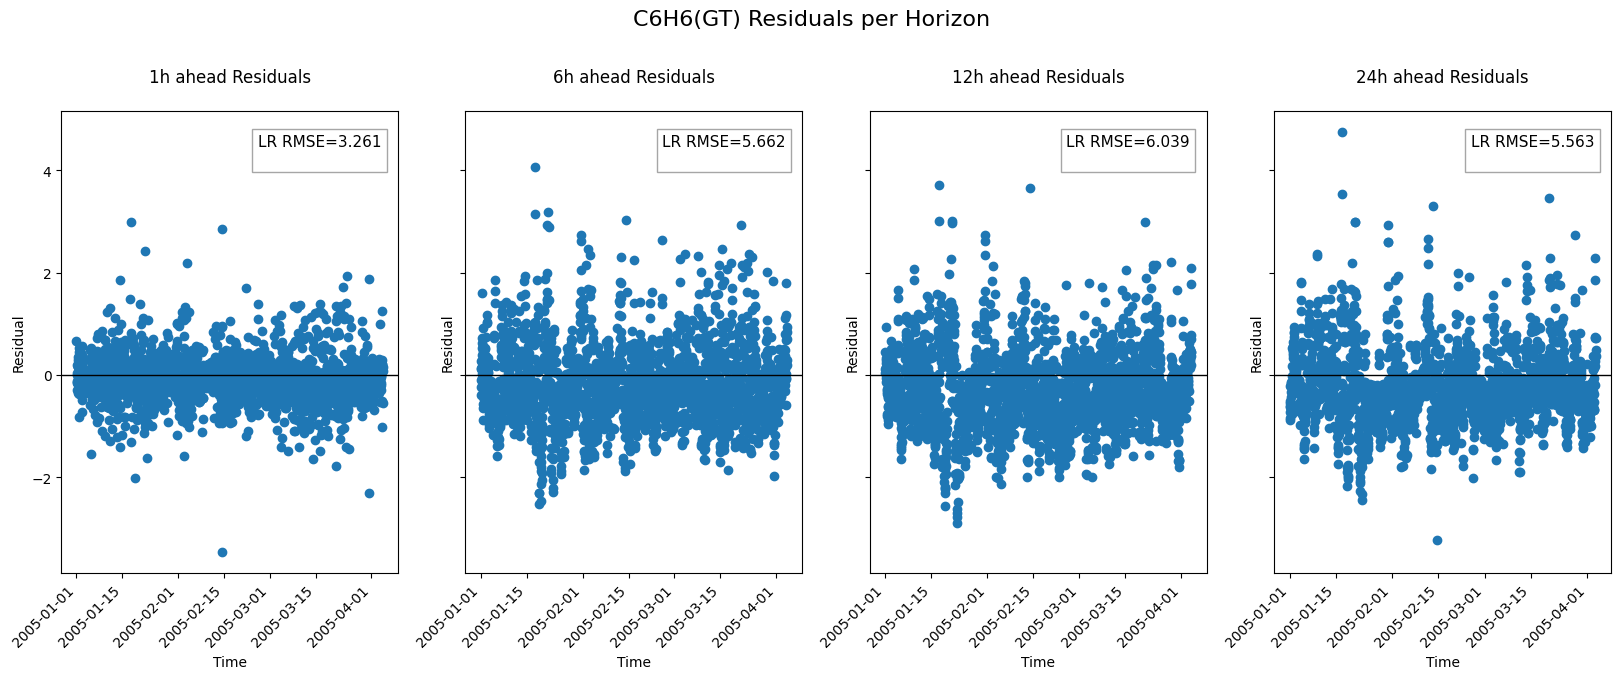

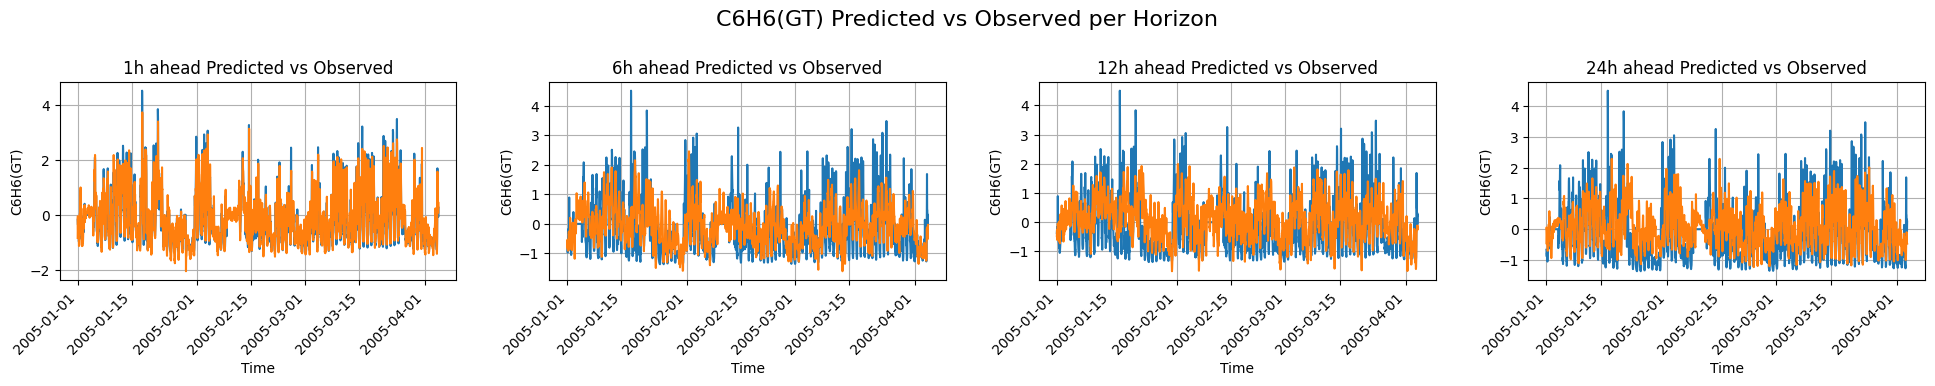

,abs_importance
PT08.S2(NMHC),0.744824
CO(GT)_MA_12h,0.250211
RH,0.243934
T,0.236278
C6H6(GT)_MA_6h,0.184972
C6H6(GT)_MA_12h,0.153650
AH,0.145424
NOx(GT)_MA_24h,0.141045
NOx(GT)_MA_12h,0.137074
C6H6(GT)_lag_1h,0.129394


In [64]:
results = rmu.train_forecast_linear_regression(df, targets[2], targets, df_unnormalised)
results[1]["importance_table"]
results[6]["importance_table"]
results[12]["importance_table"]
results[24]["importance_table"]

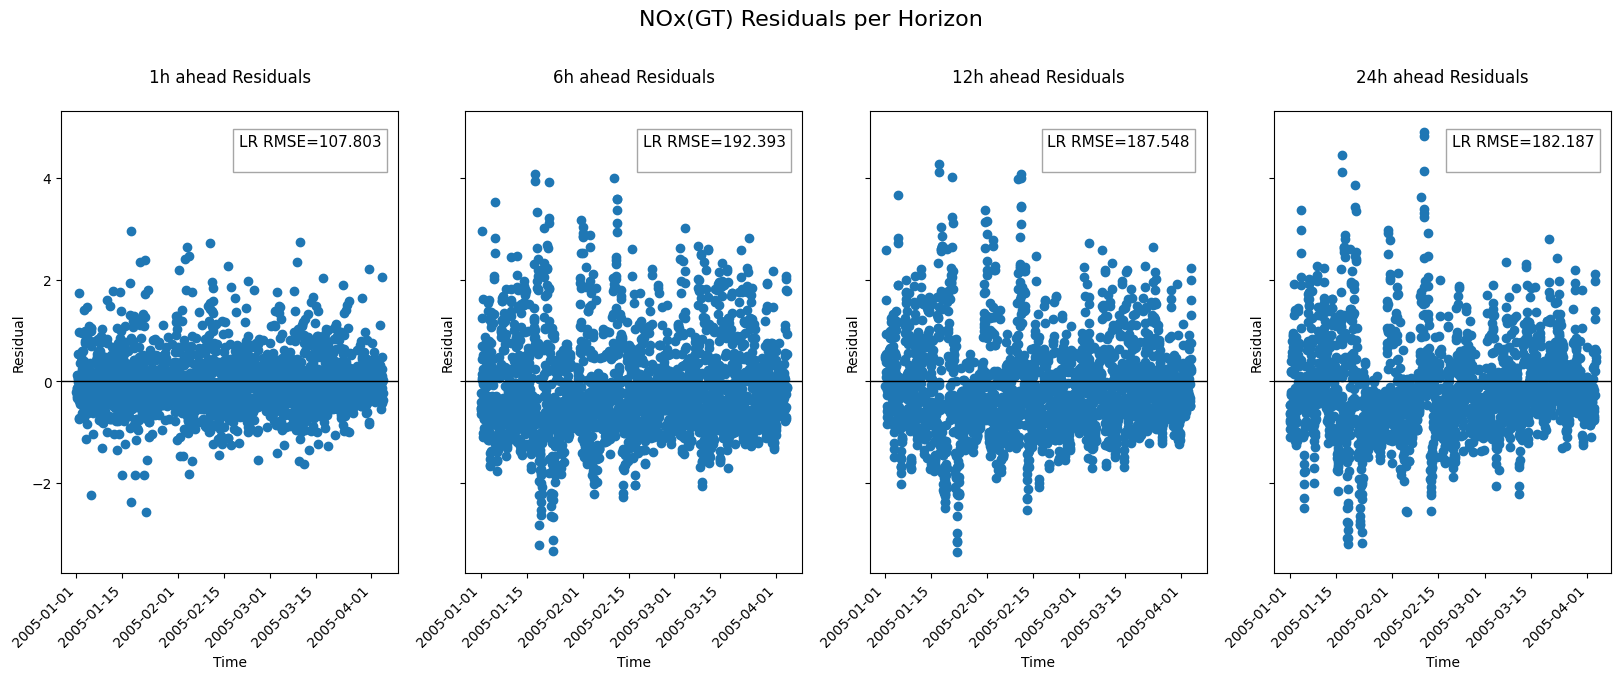

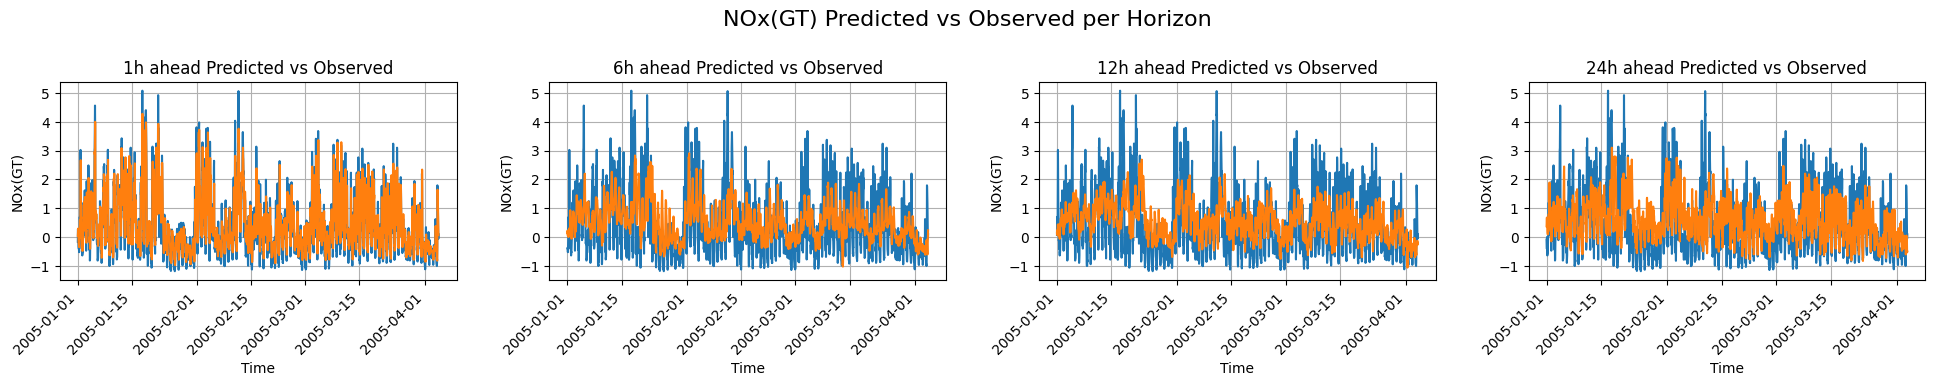

,abs_importance
PT08.S2(NMHC),0.429305
NOx(GT)_current,0.373642
T,0.351267
CO(GT)_MA_12h,0.327767
NOx(GT)_MA_12h,0.280363
AH,0.270120
RH,0.263008
PT08.S4(NO2),0.243238
NO2(GT)_current,0.134324
NOx(GT)_MA_6h,0.112285


In [65]:
results = rmu.train_forecast_linear_regression(df, targets[3], targets, df_unnormalised)
results[1]["importance_table"]
results[6]["importance_table"]
results[12]["importance_table"]
results[24]["importance_table"]

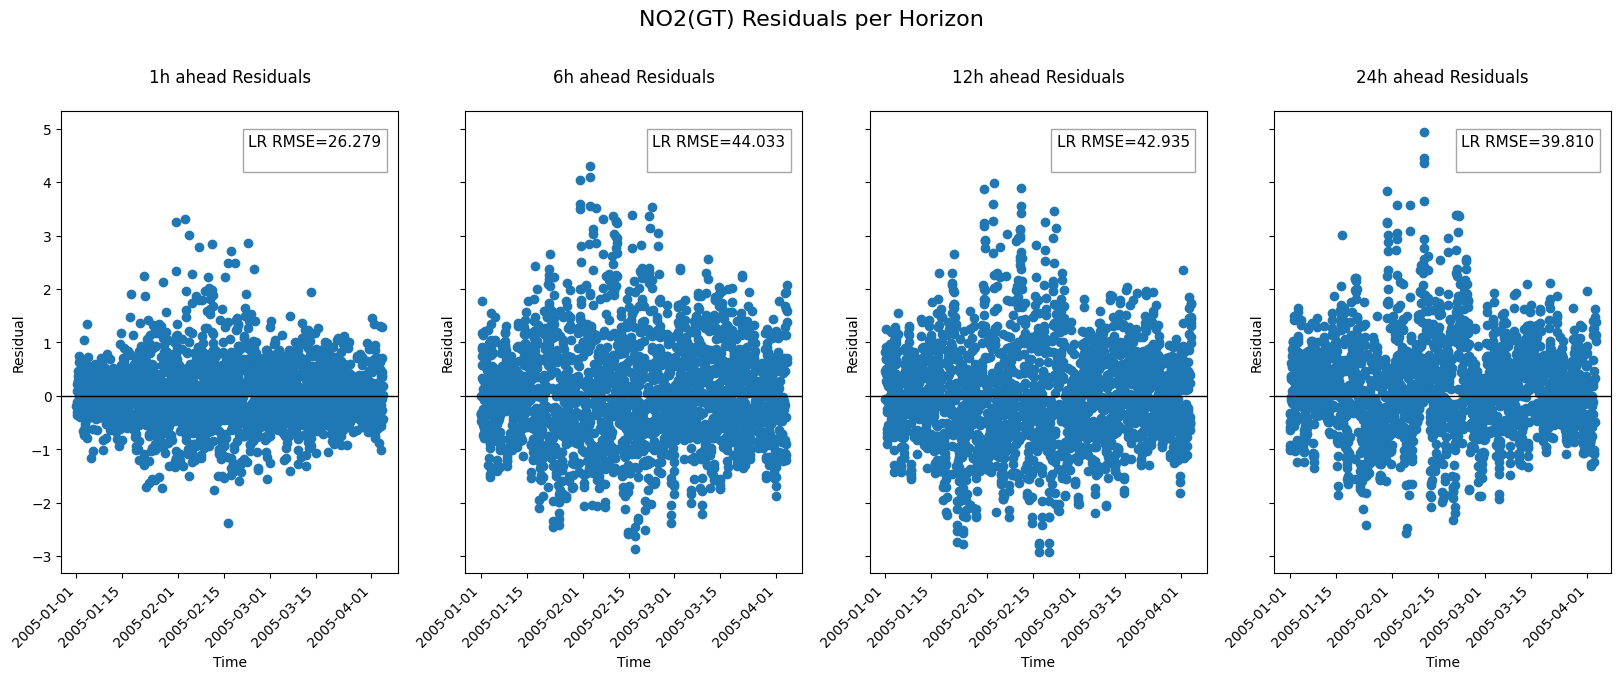

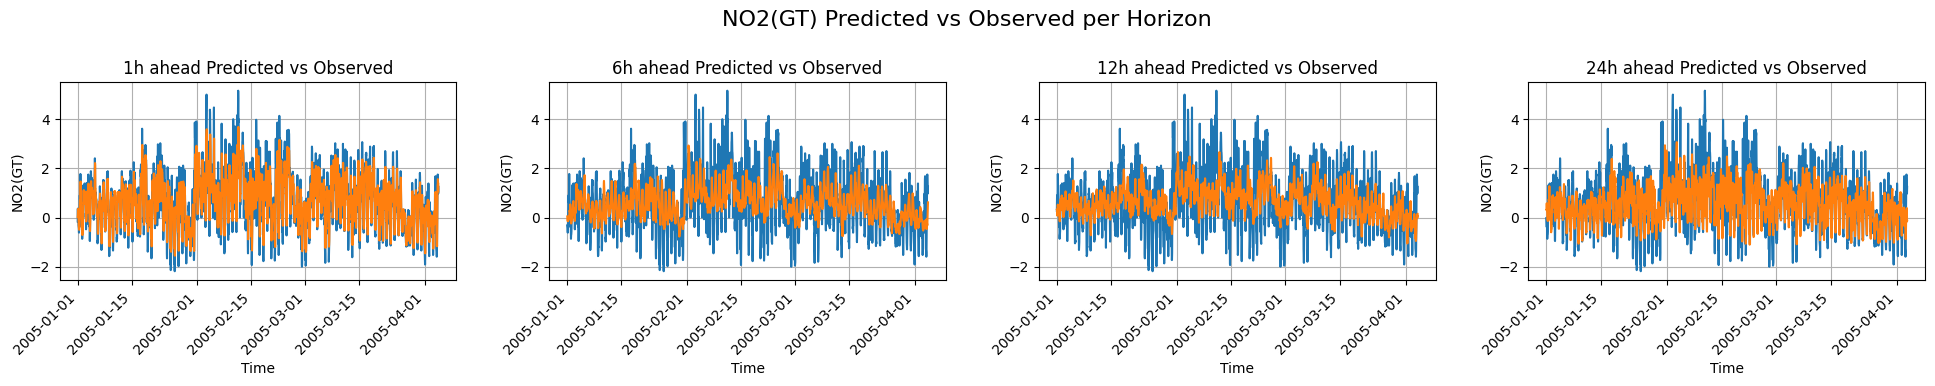

,abs_importance
NO2(GT)_current,0.510776
NOx(GT)_MA_3h,0.330180
PT08.S2(NMHC),0.318227
RH,0.218825
NOx(GT)_MA_24h,0.177697
CO(GT)_MA_12h,0.168955
PT08.S4(NO2),0.166566
NOx(GT)_MA_6h,0.152098
T,0.151056
C6H6(GT)_MA_24h,0.138698


In [66]:
results = rmu.train_forecast_linear_regression(df, targets[4], targets, df_unnormalised)
results[1]["importance_table"]
results[6]["importance_table"]
results[12]["importance_table"]
results[24]["importance_table"]